In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df_org = pd.read_csv('data/train.csv')
df = df_org.copy()

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.shape

(1628, 29)

In [5]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [6]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

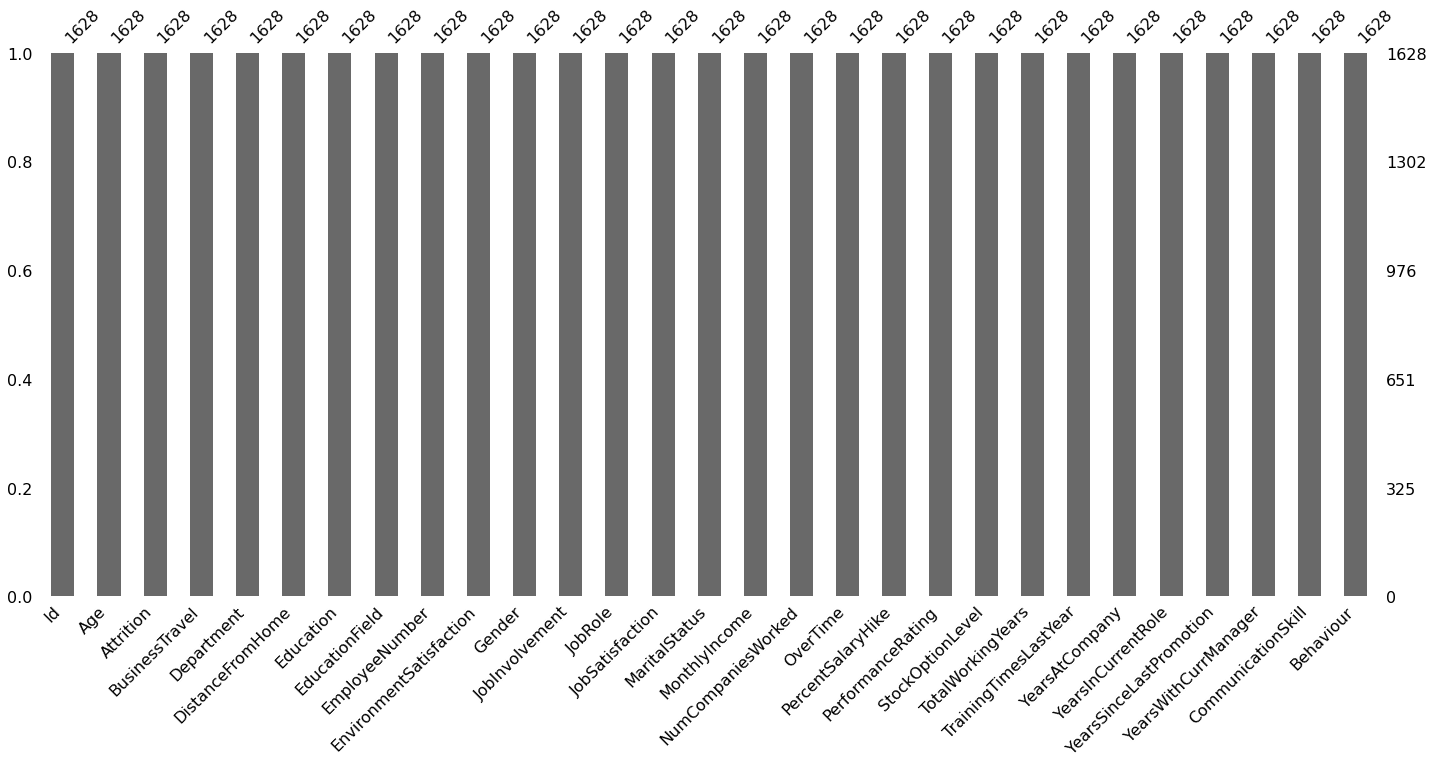

In [8]:
msno.bar(df)

In [9]:
no_use_cols = ['Id']
df.drop(no_use_cols, inplace=True, axis=1)

In [10]:
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
catnom_cols = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
catnom_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

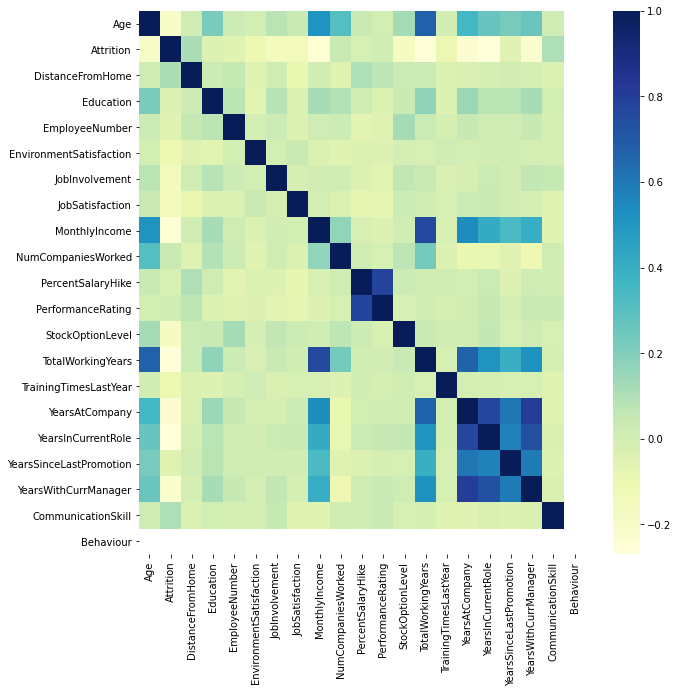

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df[int_cols].corr(), cmap="YlGnBu")

### Pointers 
- Performace Rating and Percentage Salary hike have good amount of correlation.
- Variables explaining dureation have good correlation with eachother.

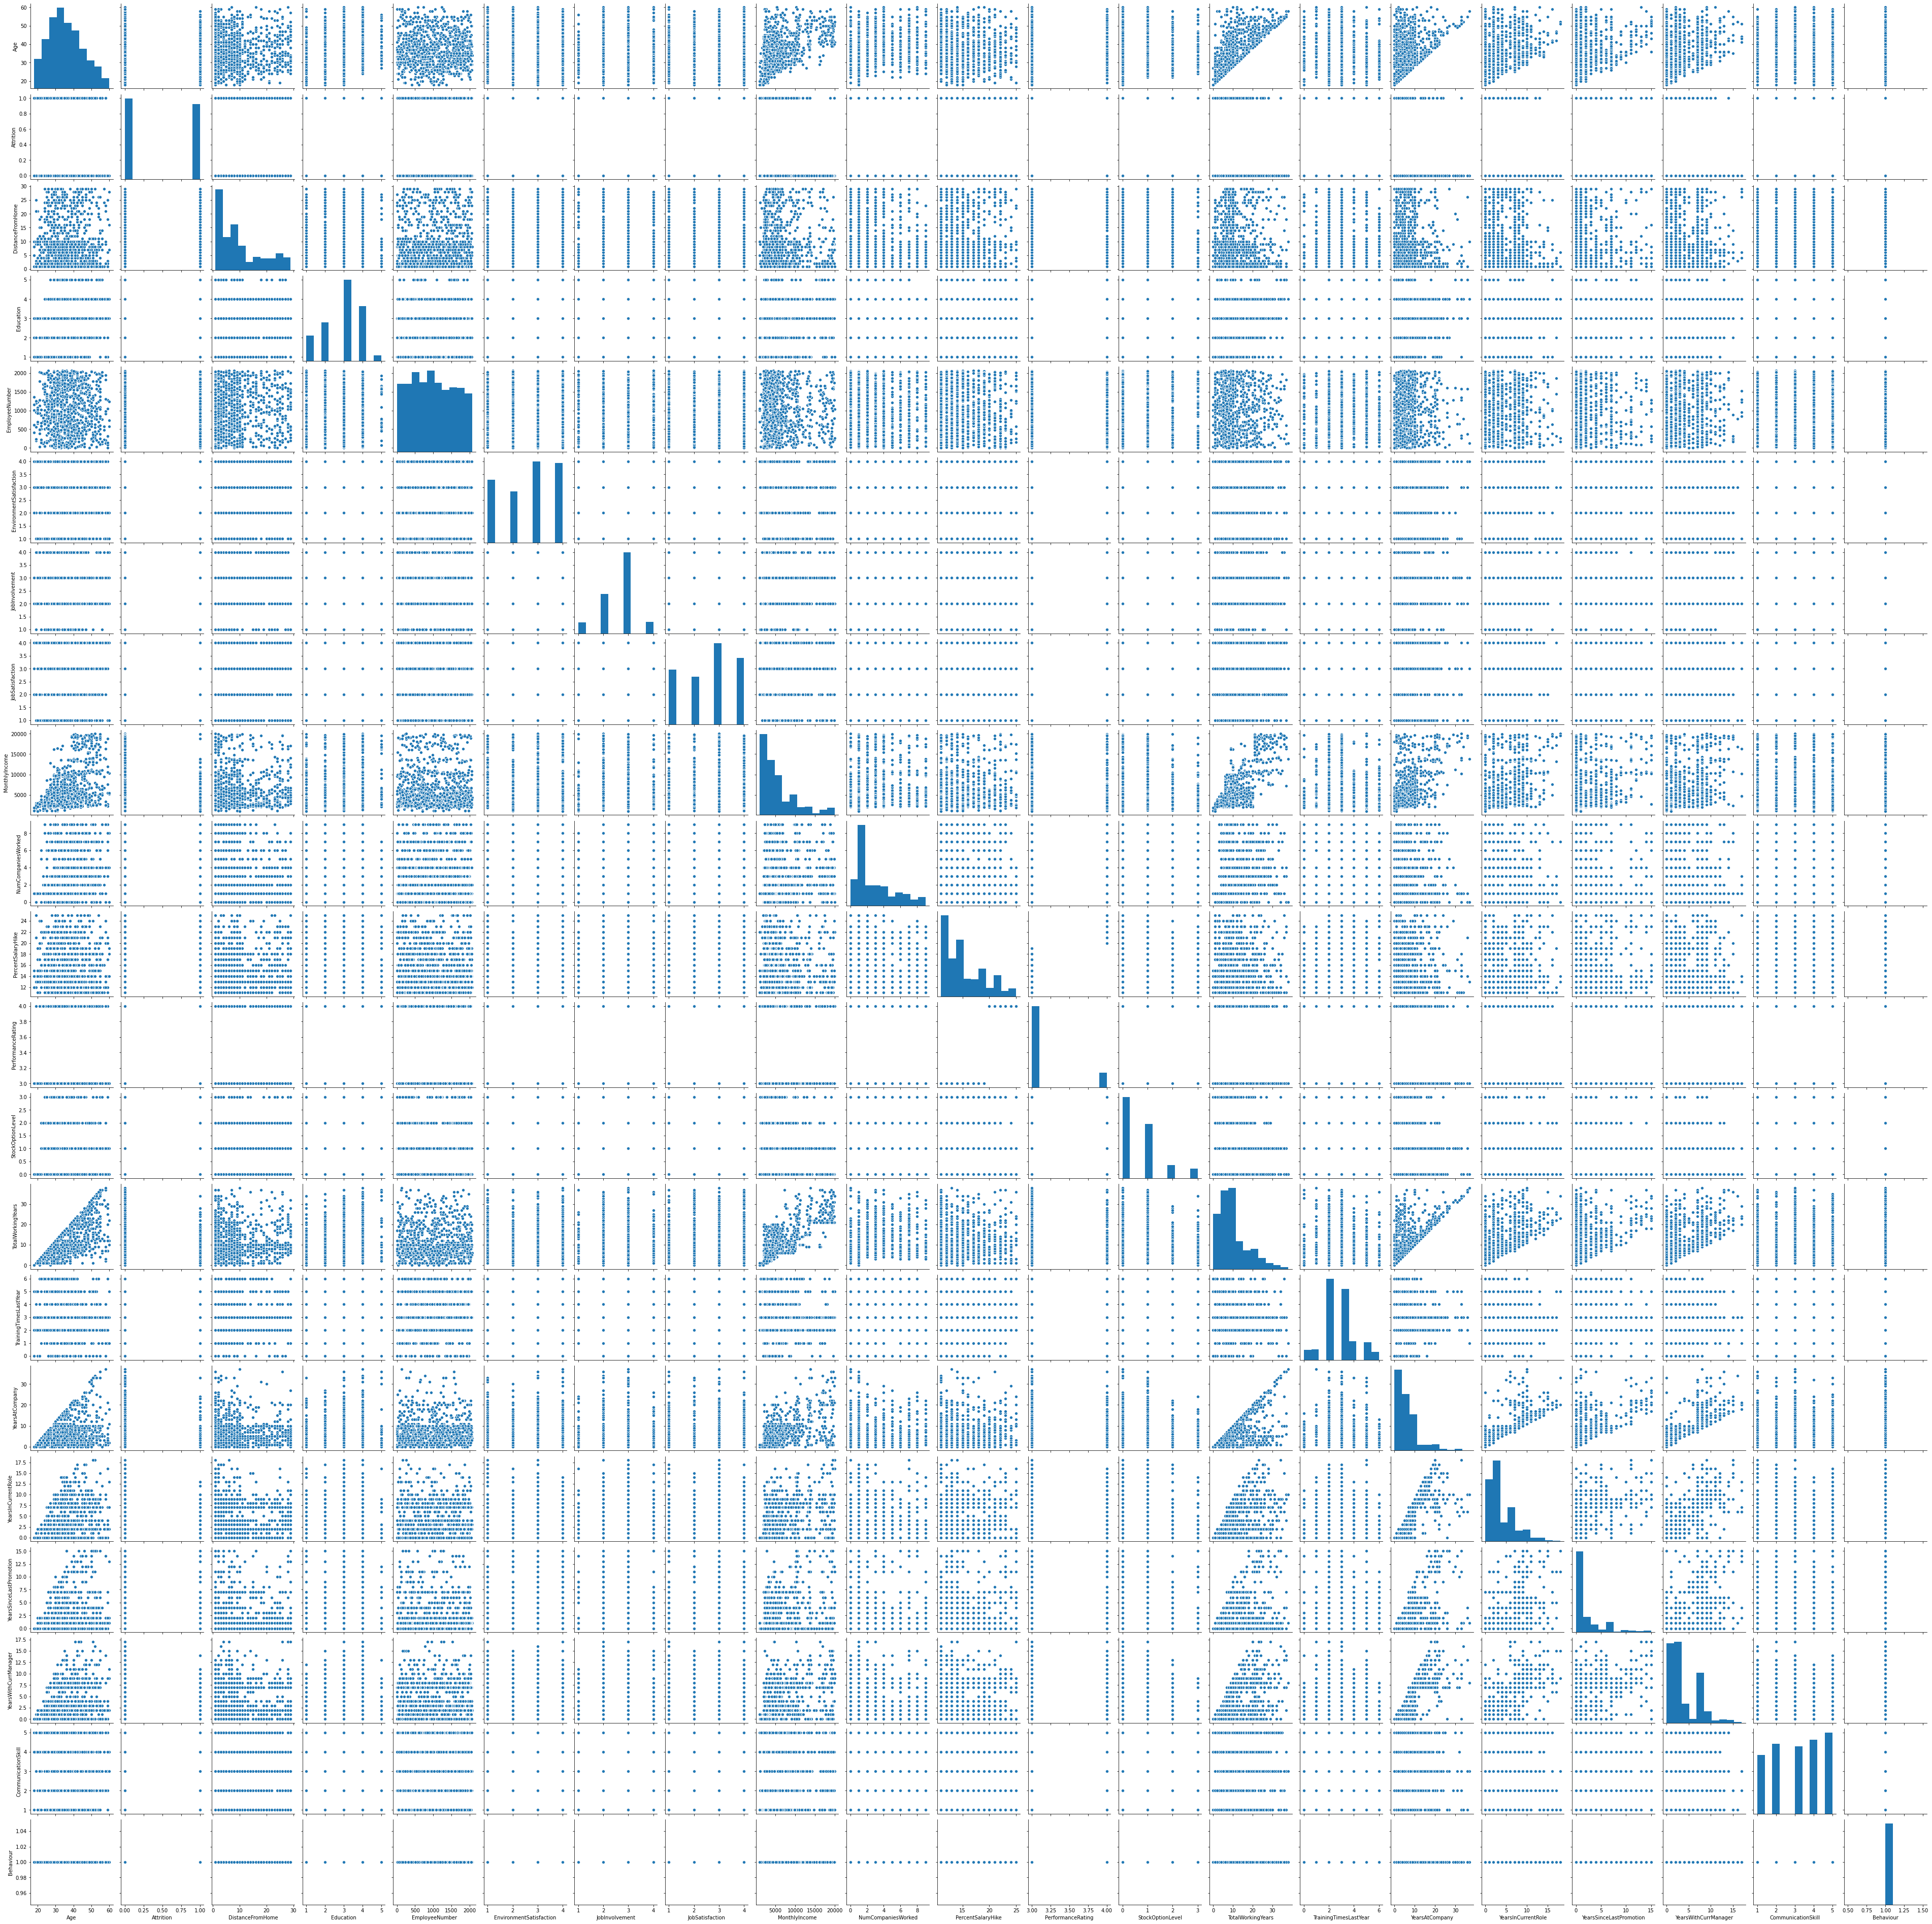

In [13]:
sns.pairplot(df[int_cols])

### Inferences  
- Behaviour Doesn't add any useful information.
- Towards higher end of years at company, attrition rate becomes very low. Same goes for total working years.
- Maybe we can omit age factor and cosider total working year only.
- Looks like distance from home doesn't have much information to provide.
- Education might have little information to add.

In [14]:
df.drop(['Behaviour'], inplace=True, axis = 1)

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

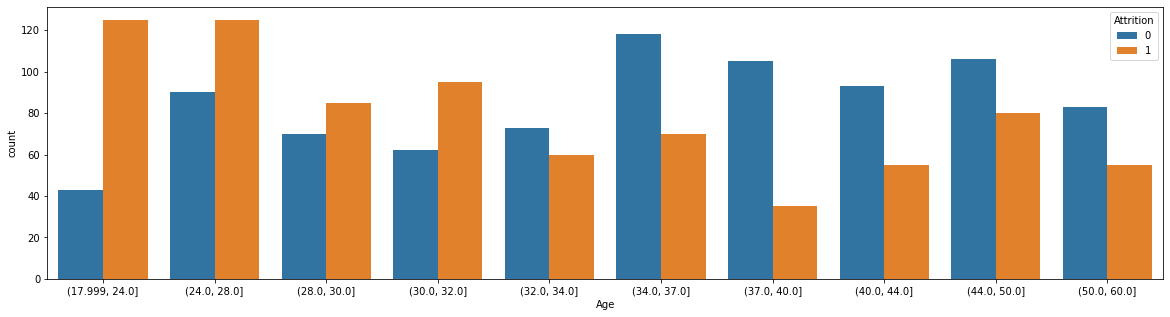

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x = pd.qcut(df.Age,10), hue = df['Attrition'])

**We can infer that people in eary 20s are more likeyly to leave the job**

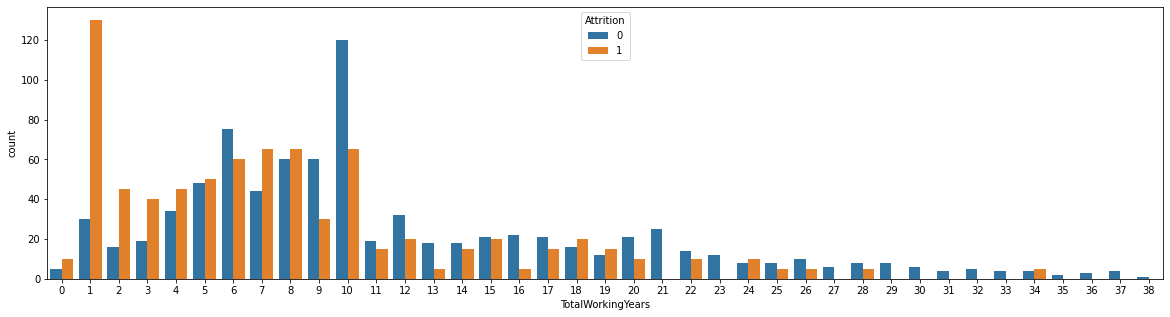

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x = df.TotalWorkingYears, hue = df['Attrition'])

**We can infer people early in jobs are more likely to leave**

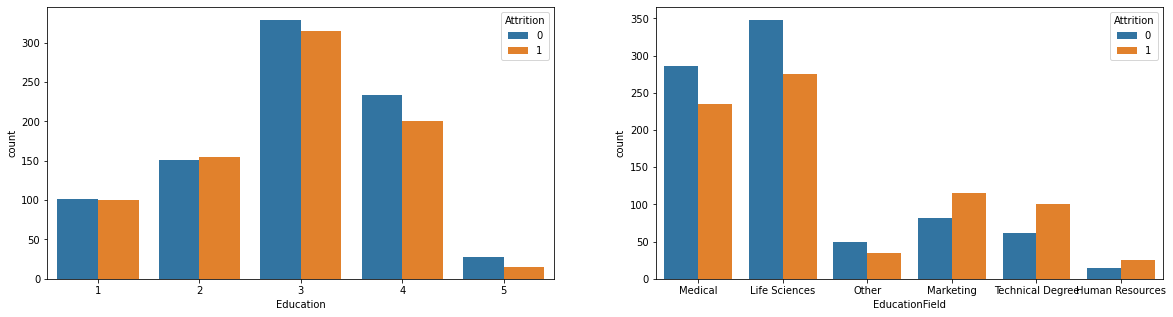

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Education', hue='Attrition',  data=df)
plt.subplot(1,2,2)
sns.countplot(x = 'EducationField', hue='Attrition', data=df)

**Education has NO valueable information for us**  
**Education field has some information. Can we dig more into it?**

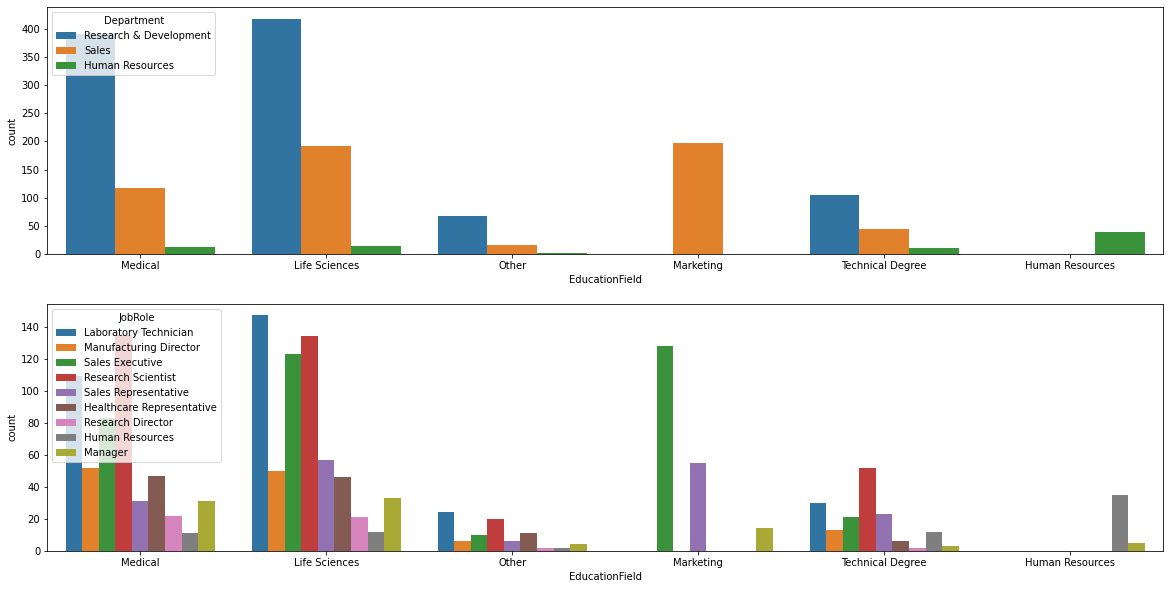

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot(x = 'EducationField', hue = 'Department', data=df)
plt.subplot(2,1,2)
sns.countplot(x = 'EducationField', hue = 'JobRole', data=df)

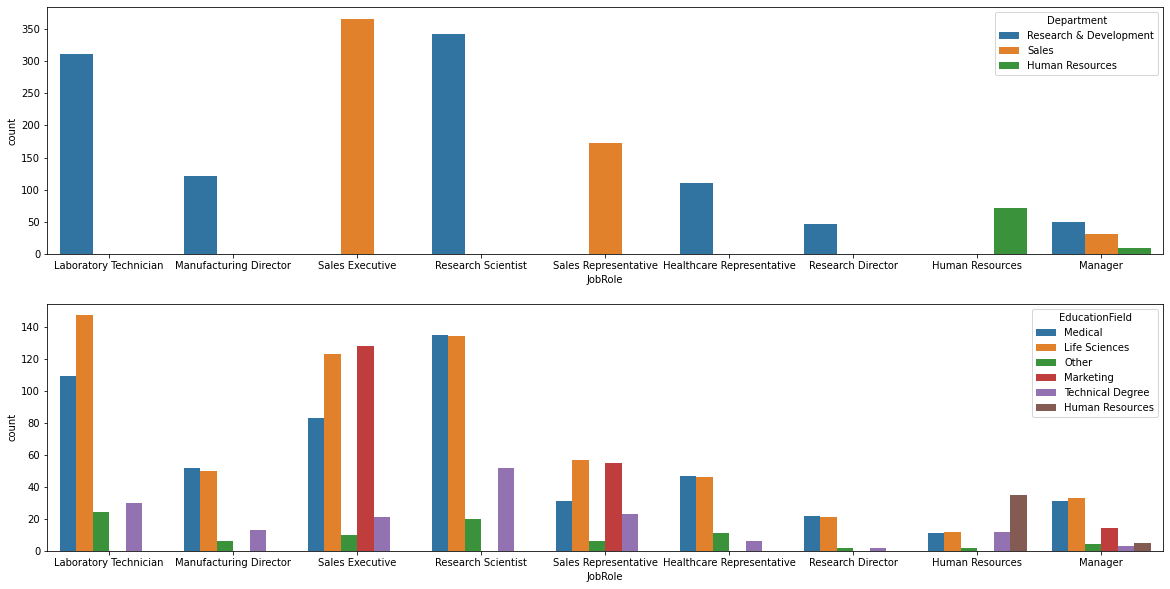

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot(x = 'JobRole', hue = 'Department', data=df)
plt.subplot(2,1,2)
sns.countplot(x = 'JobRole', hue = 'EducationField', data=df)

**That looks interesting!**  

Side Observation: Managers have high diversity and Life Sciences score higher than Tech or Marketing!

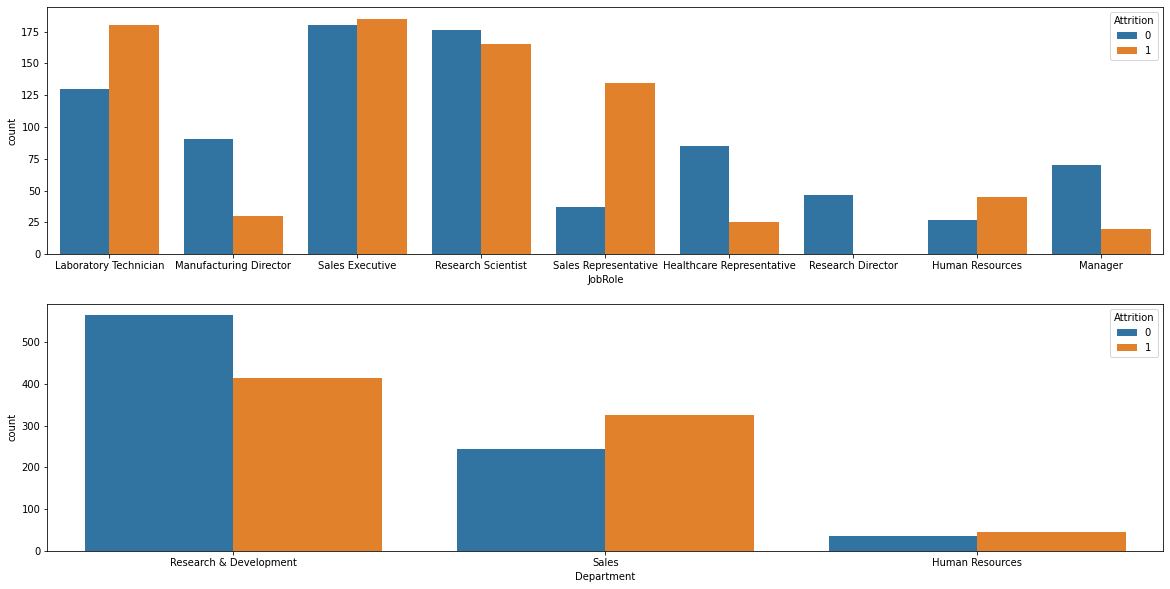

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot(x = df.JobRole, hue=df.Attrition)
plt.subplot(2,1,2)
sns.countplot(x = df.Department, hue=df.Attrition)

### Inferences  
- Job Role and Department are highly correlated. Job Role adds more information than Department does.
- Education Field adds more information than Education for Attrition variable.

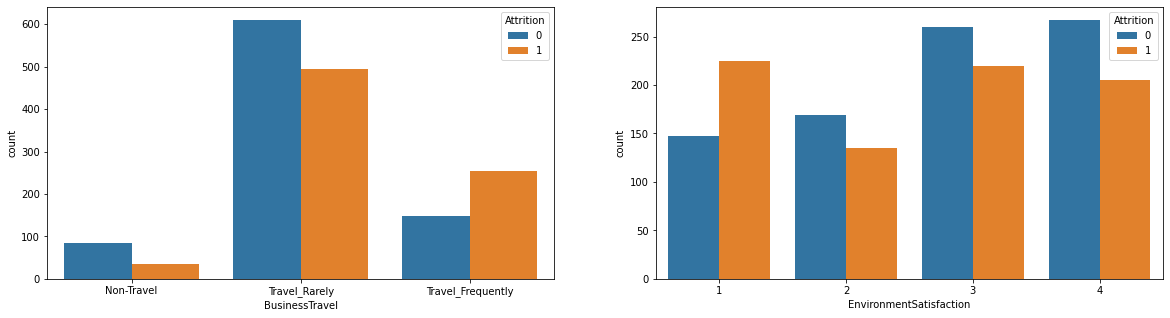

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='BusinessTravel',hue = 'Attrition', data=df)
plt.subplot(1,2,2)
sns.countplot(x='EnvironmentSatisfaction',hue = 'Attrition', data=df)

**We can infer employees are likely to leave if they have to travel frequently.  
Also, Employees with high environment satisfaction are more likely to stay than with low env satisfaction**

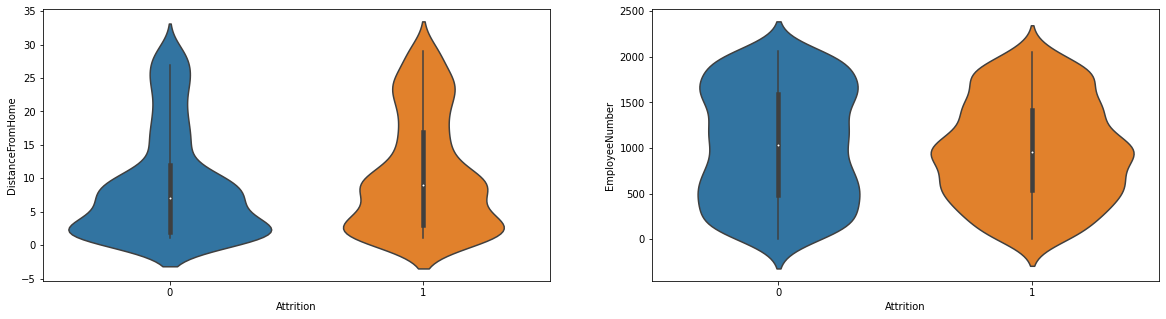

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
g = sns.violinplot(y = 'DistanceFromHome', x = 'Attrition', data = df)
plt.subplot(1,2,2)
g = sns.violinplot(y = 'EmployeeNumber', x = 'Attrition', data = df)

**Distance from Home has a little effect.  
Employee number slightly effects as when there are high employee number, employee might stay and as employee count go from 500 to 1000, There is a slightly more preference to leave.**

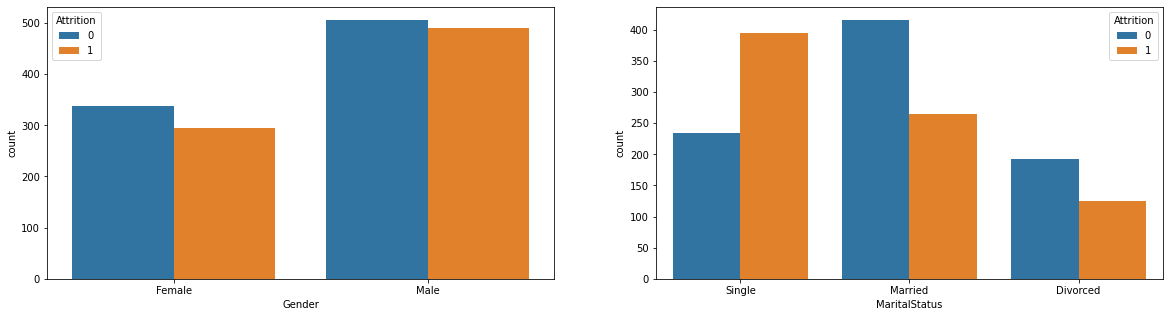

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=df.Gender, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(x=df.MaritalStatus, hue = df.Attrition)

**Attrition is irrespective of gender while is somewhat dependent on Martial status.  
Singles are more likely to leave, maybe due to no dependencies on them while married or divored are more likely to stay**

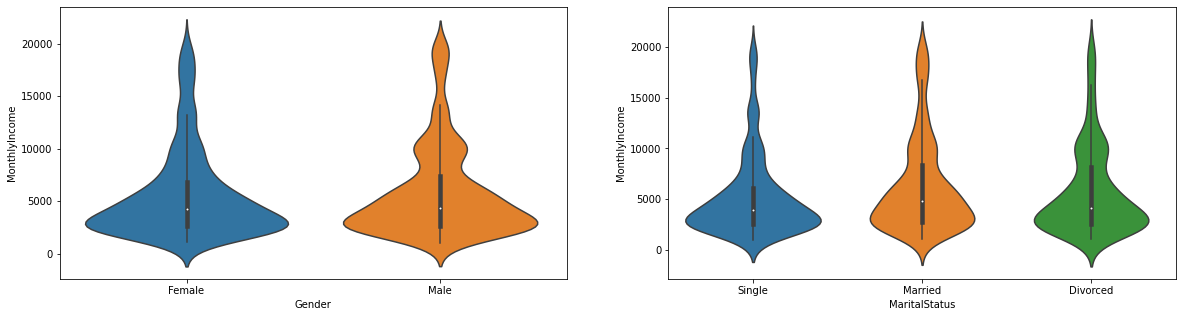

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
g = sns.violinplot(y = 'MonthlyIncome', x = 'Gender', data = df)
plt.subplot(1,2,2)
g = sns.violinplot(y = 'MonthlyIncome', x = 'MaritalStatus', data = df)

**Fairly equivalent distributions**

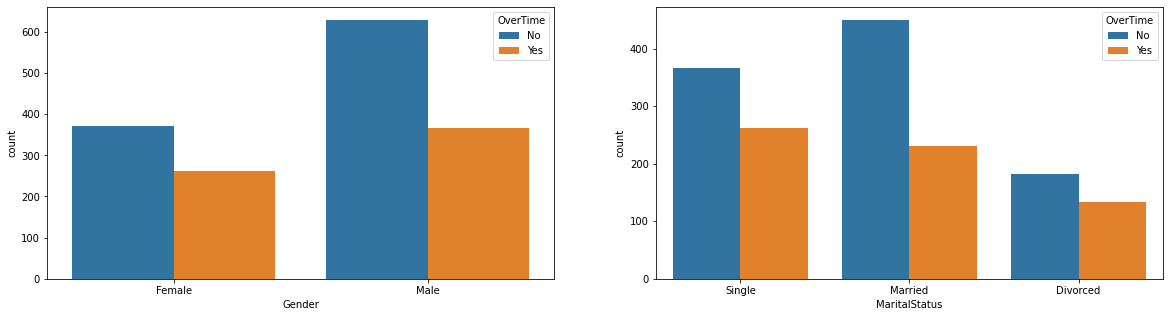

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
g = sns.countplot(x = 'Gender', hue= 'OverTime', data = df)
plt.subplot(1,2,2)
g = sns.countplot(x = 'MaritalStatus', hue= 'OverTime', data = df)

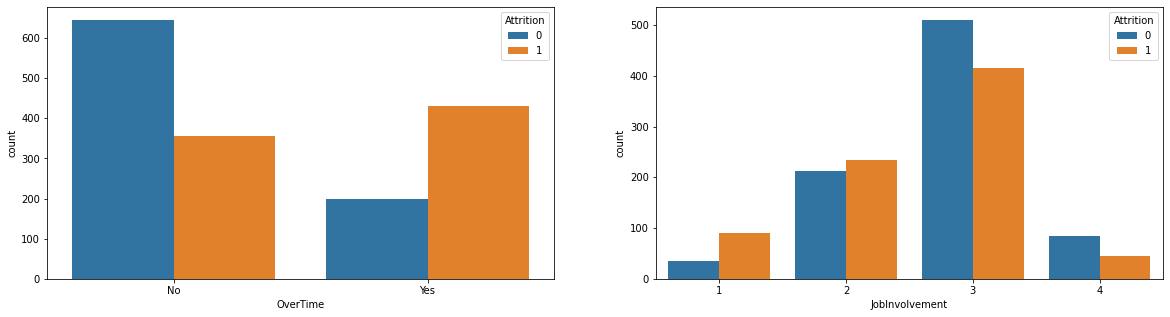

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.OverTime, hue=df.Attrition)
plt.subplot(1,2,2)
sns.countplot(x = df.JobInvolvement, hue=df.Attrition)

**People doing Overtime and people with low job involvement are more likely to leave**

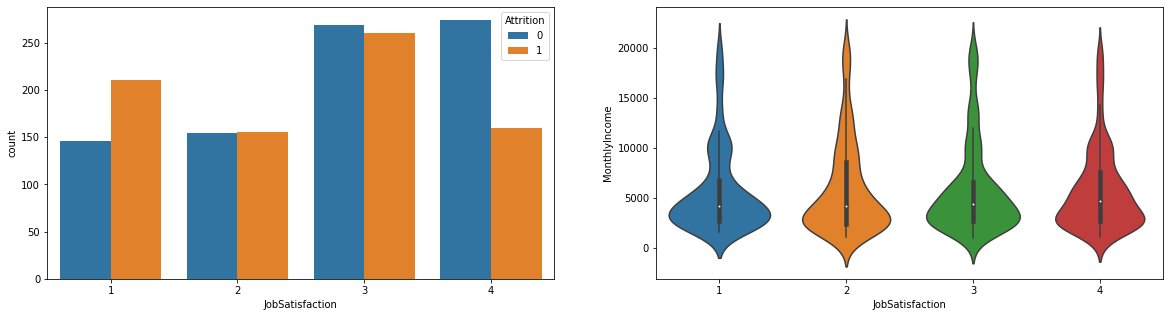

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.JobSatisfaction, hue=df.Attrition)
plt.subplot(1,2,2)
sns.violinplot(y = df.MonthlyIncome, x = df.JobSatisfaction)

**Job satisfaction has nothing to do with Monthly income while only extreme job satisfaction values impact attrition**

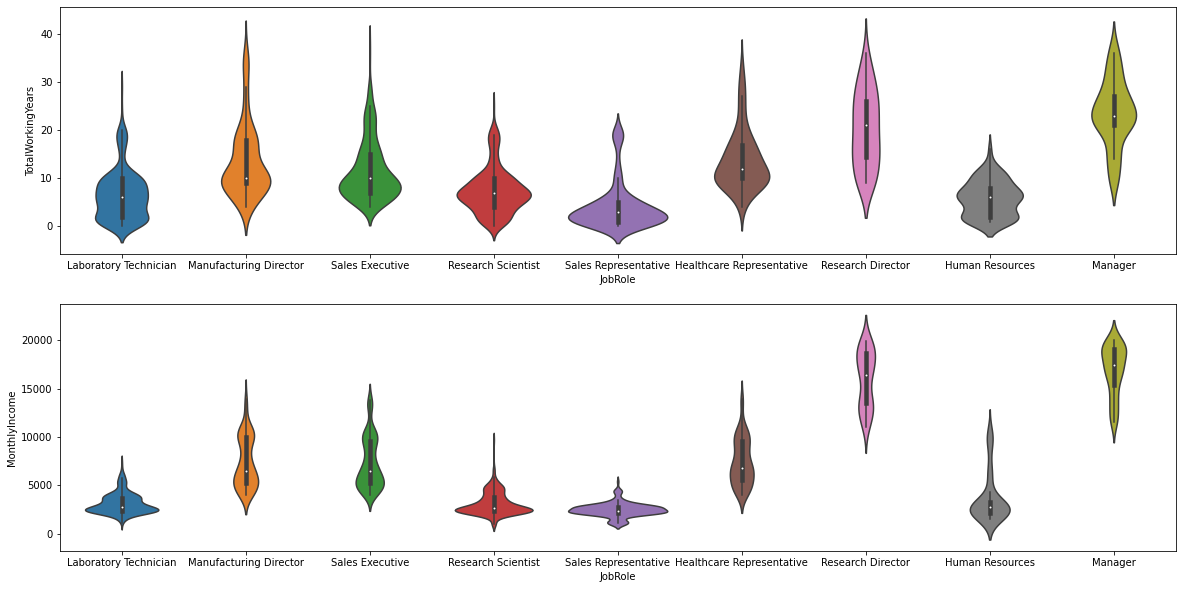

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(x = df.JobRole, y=df.TotalWorkingYears)
plt.subplot(2,1,2)
sns.violinplot(x = df.JobRole, y = df.MonthlyIncome)

**Monthly Income is guided by job role and Job role is guided by Total Working Years**

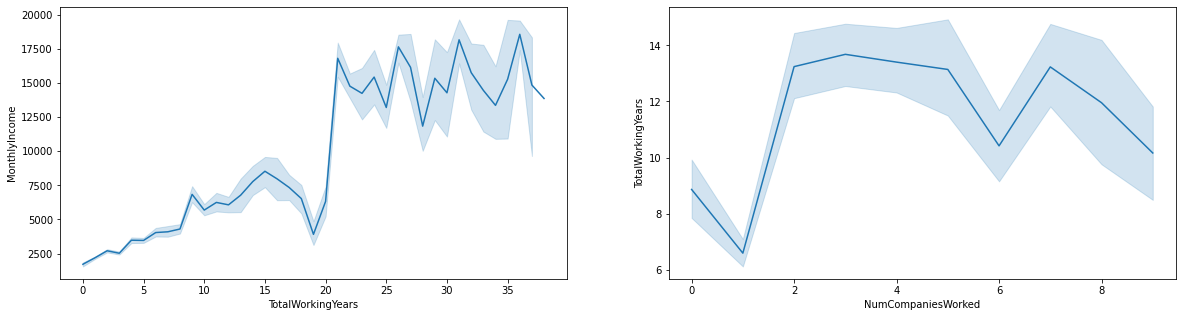

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x = df.TotalWorkingYears, y = df.MonthlyIncome)
plt.subplot(1,2,2)
sns.lineplot(y = df.TotalWorkingYears, x = df.NumCompaniesWorked)

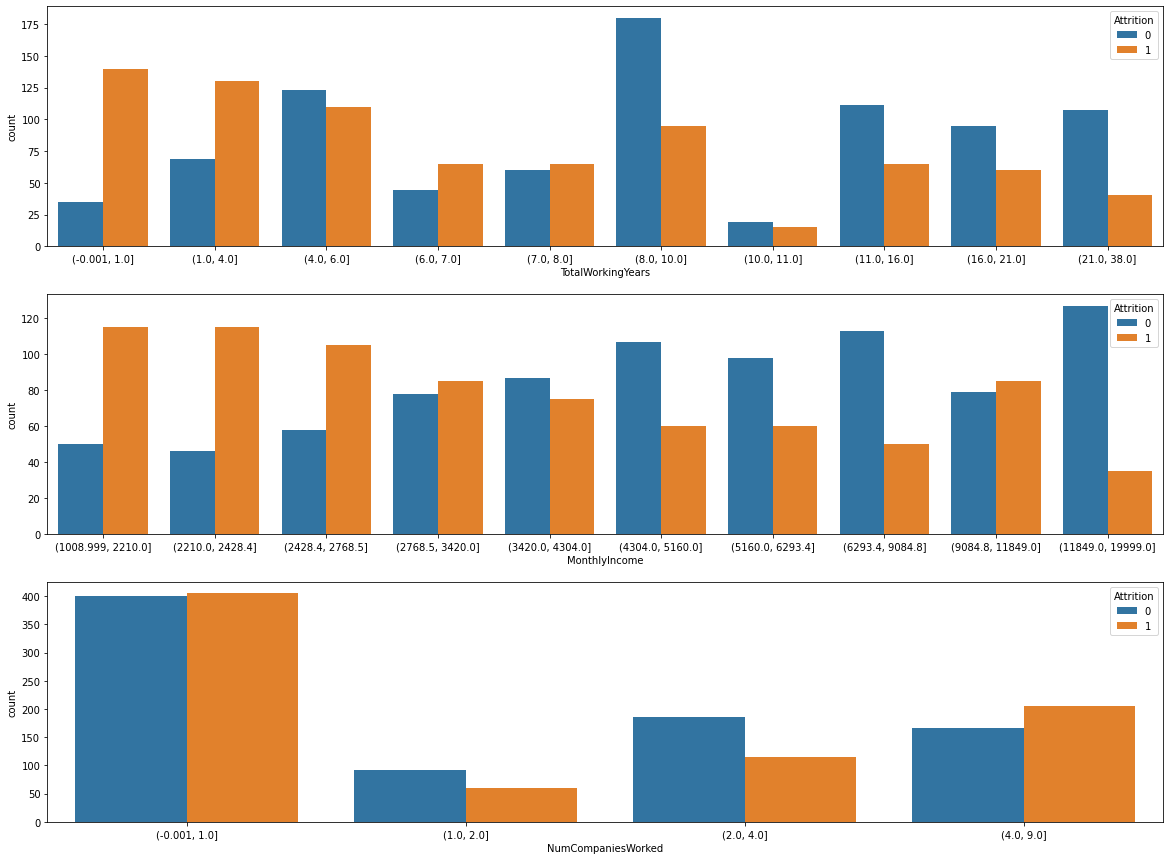

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(x = pd.qcut(df.TotalWorkingYears,10), hue=df.Attrition)
plt.subplot(3,1,2)
sns.countplot(x = pd.qcut(df.MonthlyIncome,10), hue=df.Attrition)
plt.subplot(3,1,3)
sns.countplot(x = pd.qcut(df.NumCompaniesWorked,4), hue=df.Attrition)

**We can say Attrition depends more on Monthly Income and Total Working years that number of companies worked**

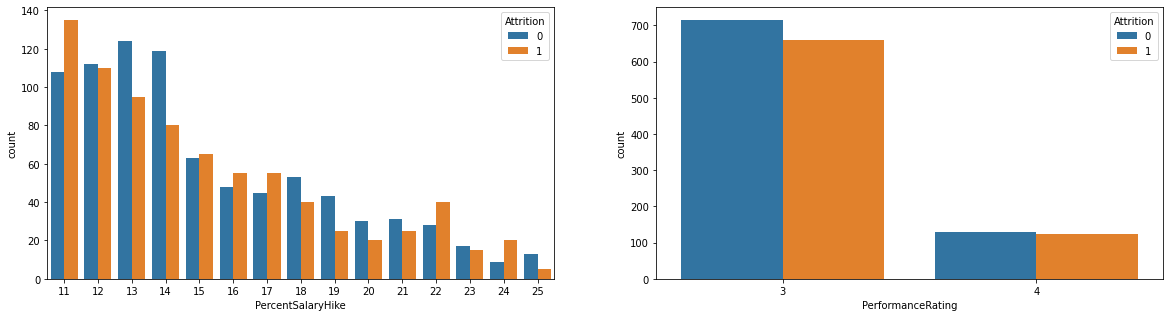

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = df.PercentSalaryHike, hue=df.Attrition)
plt.subplot(1,2,2)
sns.countplot(x = df.PerformanceRating, hue=df.Attrition)

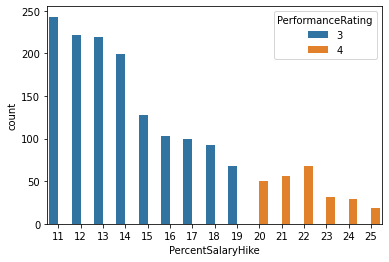

In [33]:
sns.countplot(x = df.PercentSalaryHike, hue=df.PerformanceRating)

**Performance Rating is correlated with PercentSalaryHike and doesn't really affect attribution Rate**

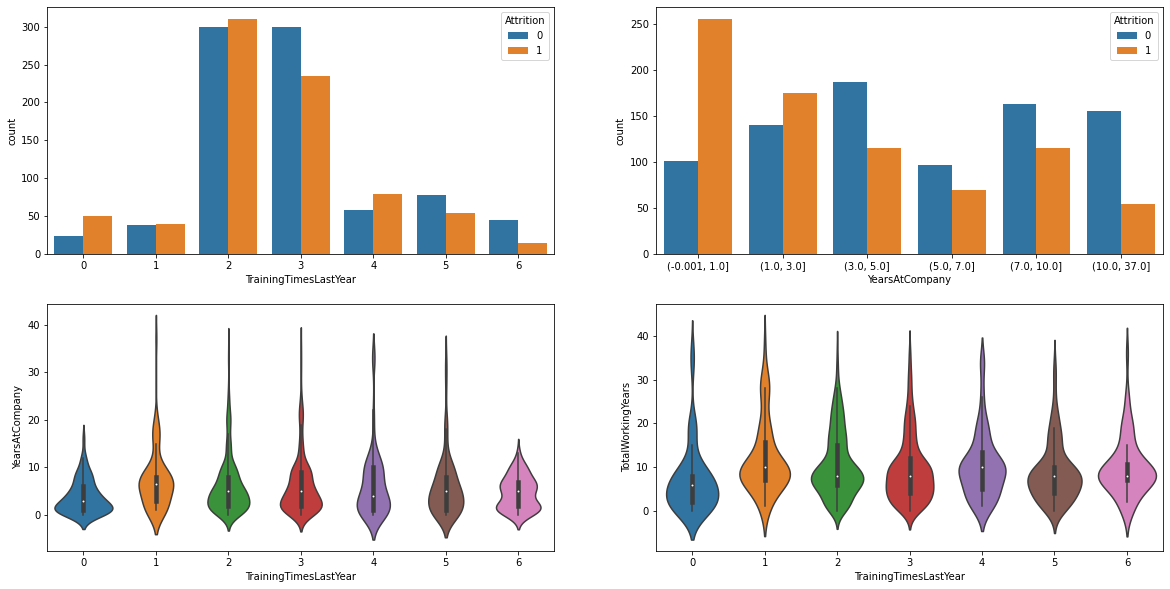

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(df.TrainingTimesLastYear, hue=df.Attrition)
plt.subplot(2,2,2)
sns.countplot(pd.qcut(df.YearsAtCompany,6), hue=df.Attrition)
plt.subplot(2,2,3)
sns.violinplot(y = df.YearsAtCompany, x= df.TrainingTimesLastYear)
plt.subplot(2,2,4)
sns.violinplot(y = df.TotalWorkingYears, x= df.TrainingTimesLastYear)

**Inferences**  
- People getting good learning environment less likely to leave  
- People who spent more years in a company are likely to stay  
- New people who joined the company are being trained more  
- Less experienced people are being trained more.**

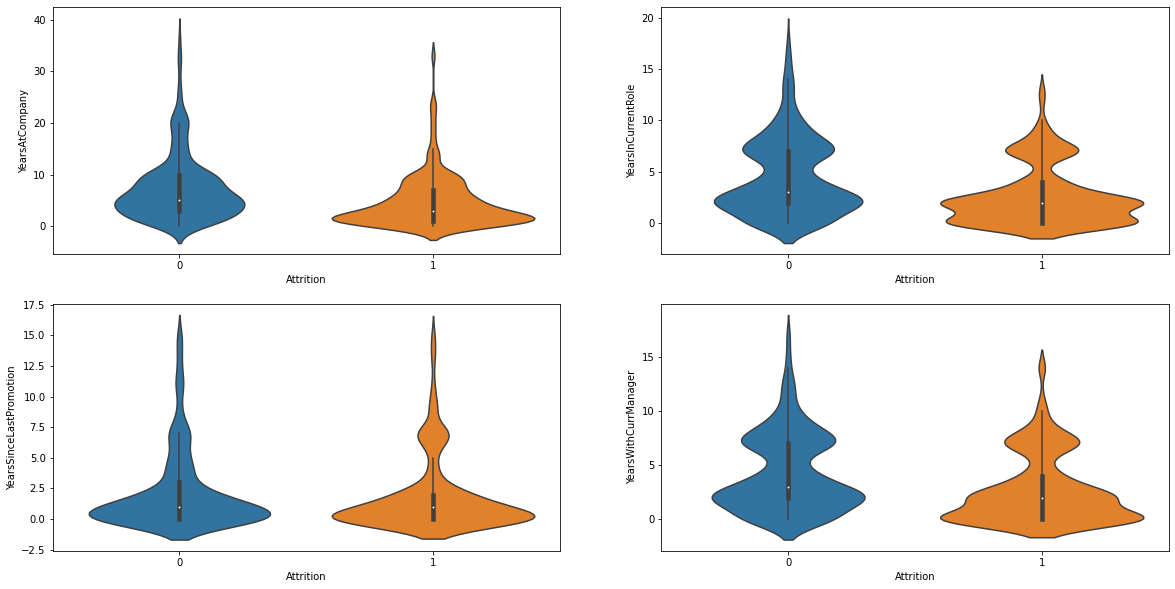

In [35]:
cols_to_look = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(20,10))
for i,col in enumerate(cols_to_look):
    plt.subplot(2,2,i+1)
    sns.violinplot(y = df[col], x= df.Attrition)

**Inferences**  
- People who spent more time at company are less likely to leave
- As people spend more time with manager, They are less likely to leave.
- Other parameters might have age as a lurking variable. People with more time without promotion should have left but might be due to lurking variables like age, job role or job satisfaction.

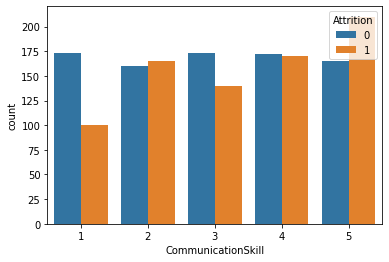

In [36]:
sns.countplot(x = df.CommunicationSkill , hue = df.Attrition)

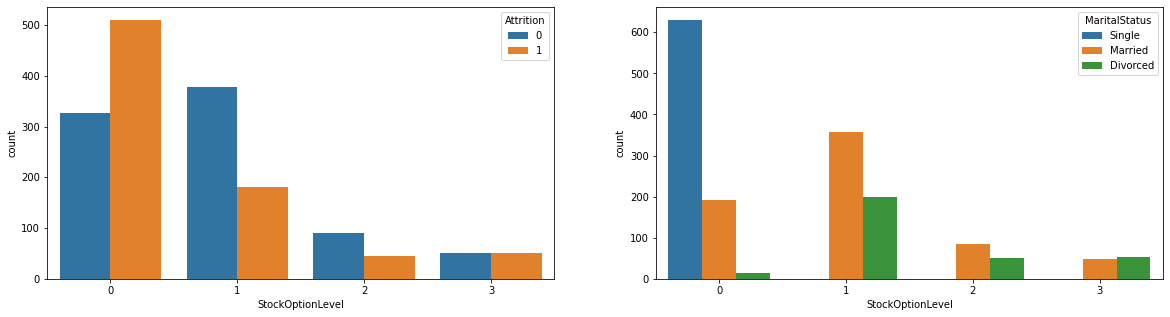

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df.StockOptionLevel, hue = df.Attrition)
plt.subplot(1,2,2)
sns.countplot(df.StockOptionLevel, hue = df.MaritalStatus)

**People who own stocks for the company believe in it and are less likely to leave. Also, There is a correlation between Marital Status and Stock owned level**

### Thoughts on Attributes to keep for Attrition Based on Graphs and Inferences

#### Attributes to Let Go  
- Behaviour
- Gender
- Marital Status
- Education
- Department
- Performance Rating  

#### Attributes we might Let Go
- NumCompaniesWorked
- Training Times Last Year
- Years in Current Role
- Years Since Last Promotion
- Years With Current Manager  


#### Views After Feature Selection Techniques for Attributes we were doubtful about
- Keep NumCompaniesWorked
- We can safely drop others

In [38]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

## Feature Engineering

In [52]:
pd.Series(df.TotalWorkingYears / (df.NumCompaniesWorked+1)).describe()

count    1628.000000
mean        3.637854
std         3.995064
min         0.000000
25%         1.100000
50%         2.500000
75%         5.000000
max        38.000000
dtype: float64

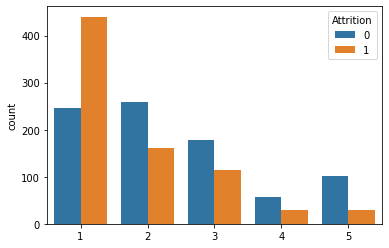

In [59]:
sns.countplot(pd.cut((df.TotalWorkingYears / (df.NumCompaniesWorked+1)),[0,2,4,6,8,np.inf], labels=[1,2,3,4,5]), hue=df.Attrition)

**Feature like number of years per company can be derived. Looks interesting as well!**